In [26]:
import pandas as pd
import numpy as np
import logging as log

from data_prepare import getLogsFromDBByUserID

In [28]:
df = pd.read_pickle('../data/173211-9739.pkl')
df['event'] = df['method'] + ':' + df['urlEntry']

In [40]:
eventMap = {event: id for id, event in enumerate(df['event'].value_counts().keys())}
for id in eventMap.values(): 
    if id == 0:
        print(id)

In [47]:
for id, event in enumerate(df['event'].value_counts().keys()):
    print((id, event))

(0, 'GET:/fin/arRulesSetCommon/get/{id}')
(1, 'POST:/fin/arBillAssembly/getRefInfoList')
(2, 'GET:/fin/arBillAssembly/getBankInfo/{userId}/{acctype}')
(3, 'POST:/fin/arBillWF/doWorkFlow')
(4, 'GET:/fin/arBill/getArBillAllTODO')
(5, 'POST:/od/workflow/getToDoList')
(6, 'GET:/fa/asset/assetInfo/remoteGetPagedCanUseList')
(7, 'POST:/fin/arBill/getArBillAll')
(8, 'GET:/fa/commoncore/assetCommonCore/remoteGetCurrenUserInfo')
(9, 'GET:/fin/ar/billSource/getNodeDetail/{sourceId}')
(10, 'GET:/fin/arBillType/{billType}')
(11, 'GET:/fin/arExpenseLinkBillType/getExpenseLinkBillTypeSetByBillType/{billType}')
(12, 'POST:/portal/menus')
(13, 'GET:/portal/shortcutconfig/getConfigCompletion')
(14, 'GET:/fa/commoncore/todoCommonCore/remoteGetTotalTodoNum')
(15, 'GET:/fin/arBillType/queryUsedBillType/1/ar')
(16, 'GET:/fa/commoncore/assetCommonCore/remoteGetDataDictionary')
(17, 'GET:/fa/commoncore/todoCommonCore/remoteGetPagedPendingList')
(18, 'POST:/fin/arBillMessage/send')
(19, 'POST:/fin/arBillTrave

In [18]:
from datetime import datetime
# 增加日期
df['date'] = df['time'].apply(lambda x : datetime.fromtimestamp(x))
df.sort_values(by='time', ascending=True, inplace=True)
df = df.reset_index(drop=True)

In [19]:
dates = df['date'].copy()
dates.sort_values(ascending=True, inplace=True)
# print(dates)
values = []
for i in range(1, len(dates)):
    values.append((dates[i] - dates[i-1]).total_seconds())
    if (dates[i] < dates[i-1]): 
        print(i, dates[i-1], dates[i])
v = np.asarray(values)
# values

NameError: name 'np' is not defined

In [ ]:
dates

0      2020-04-07 10:31:42.199
1      2020-04-07 10:31:42.311
2      2020-04-07 10:31:42.891
3      2020-04-07 10:31:44.093
4      2020-04-07 10:31:44.114
                 ...          
1853   2021-03-05 16:41:35.259
1854   2021-03-05 16:41:35.277
1855   2021-03-05 16:41:35.623
1856   2021-03-05 16:41:35.668
1857   2021-03-05 16:41:35.716
Name: date, Length: 1858, dtype: datetime64[ns]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# threshold = 60*60*2
threshlodd = 30
data = []
for i in values:
#     if i < threshold and i >= threshlodd: 
    data.append(i)
# max(data)
# d = np.asarray(data)
# plt.hist(bins=300, x=d)

[0.112,
 0.58,
 1.202,
 0.021,
 20.726,
 0.026,
 1.781,
 0.107,
 0.523,
 1.837,
 0.002,
 0.002,
 0.15,
 0.002,
 0.004,
 41.263,
 0.116,
 0.422,
 1658037.32,
 0.185,
 0.641,
 2.827,
 0.037,
 47.451,
 0.04,
 39.155,
 0.034,
 28.153,
 0.007,
 8.236,
 0.297,
 0.439,
 226.117,
 0.209,
 0.899,
 428.181,
 0.141,
 1.014,
 145.093,
 0.18,
 0.672,
 81.632,
 0.204,
 0.86,
 76.044,
 0.215,
 0.73,
 114.891,
 0.18,
 0.738,
 2593.134,
 0.238,
 0.998,
 74.634,
 0.195,
 0.63,
 65.559,
 0.136,
 0.522,
 1224.435,
 0.226,
 0.975,
 64963.674,
 0.159,
 0.635,
 1.133,
 0.036,
 39.643,
 0.142,
 0.447,
 135.494,
 0.125,
 0.51,
 3.839,
 0.015,
 74.838,
 0.11,
 0.523,
 119.283,
 0.14,
 0.463,
 2.249,
 0.021,
 34.182,
 0.017,
 16334242.403,
 0.084,
 0.208,
 0.014,
 0.01,
 0.007,
 0.051,
 0.004,
 0.02,
 0.031,
 0.07,
 0.047,
 0.525,
 0.048,
 0.086,
 10.714,
 0.317,
 0.005,
 0.0,
 0.001,
 0.0,
 0.029,
 1.766,
 9.286,
 6.883,
 0.003,
 0.0,
 0.004,
 0.036,
 0.0,
 0.0,
 0.001,
 0.028,
 0.027,
 0.023,
 0.03,
 0.362,
 0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


<AxesSubplot:>

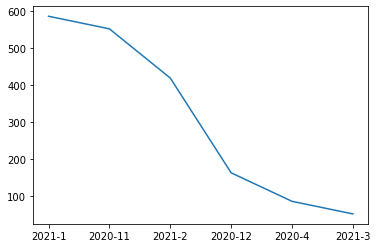

In [ ]:
months = df['date'].apply(lambda x : "%d-%d"%(x.year, x.month))
data = months.value_counts()
data.plot()

In [ ]:
df

,time,urlEntry,method,parameterName,headers,name,ip,date
0,1.586270e+09,/fa/commoncore/assetCommonCore/remoteGetCurren...,GET,,"[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:42.199
1,1.586270e+09,/fa/asset/assetInfo/remoteGetPagedCanUseList,GET,"[""offset"",""limit"",""sort"",""example""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:42.311
2,1.586270e+09,/fa/commoncore/todoCommonCore/remoteGetTotalTo...,GET,,"[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:42.891
3,1.586270e+09,/fa/commoncore/assetCommonCore/remoteGetDataDi...,GET,"[""types""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:44.093
4,1.586270e+09,/fa/commoncore/todoCommonCore/remoteGetPagedPe...,GET,"[""offset"",""limit"",""sort"",""example""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:44.114
...,...,...,...,...,...,...,...,...
1853,1.614980e+09,/pm/integrate/prjInfoIntegrate/getPersonalPrjD...,GET,,"[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.259
1854,1.614980e+09,/fa/asset/assetInfo/remoteGetPagedCanUseList,GET,"[""offset"",""limit"",""sort"",""example""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.277
1855,1.614980e+09,/fin/arBill/getArBillAllTODO,GET,"[""mobile""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.623
1856,1.614980e+09,/pm/commoncore/todoCommonCore/getPmTotalPendin...,GET,"[""isMobile""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.668


In [ ]:
output = '../data/rewriteLog.log'
with open(output, 'w') as f:
    for logEntry in df.itertuples():
        f.write("%s %s %s %s %s %s %s\n" % (
            logEntry[8],
            logEntry[2],
            logEntry[3],
            logEntry[4],
            logEntry[5],
            logEntry[6],
            logEntry[7],
        ))

In [ ]:
from spellpy import spell

tau = 0.5
# input_dir = '../data/'
output_dir = '../data/output/'
log_format = '<Date> <Time> <Url> <Method> <Content> <Headers> <Name> <ADDR>'

parser = spell.LogParser(
    indir='./',
    outdir='./',
    log_format=log_format,
#     logmain=log_main,
    tau=tau,
)

parser.parse(output)


[2021-11-19 06:29:37,874][INFO]: Parsing file: ./../data/rewriteLog.log
[2021-11-19 06:29:37,926][INFO]: Loaded 100.0% of log lines.
[2021-11-19 06:29:37,931][INFO]: load_data() finished!
[2021-11-19 06:29:38,029][INFO]: Processed 100.0% of log lines.
[2021-11-19 06:29:38,056][INFO]: Output parse file
[2021-11-19 06:29:38,071][INFO]: rootNodePath: ./rootNode.pkl
[2021-11-19 06:29:38,073][INFO]: logCluLPath: ./logCluL.pkl
[2021-11-19 06:29:38,074][INFO]: Store objects done.
[2021-11-19 06:29:38,074][INFO]: Parsing done. [Time taken: 0:00:00.200329]


In [23]:
df

,time,urlEntry,method,parameterName,headers,name,ip,date
0,1.586270e+09,/fa/commoncore/assetCommonCore/remoteGetCurren...,GET,,"[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:42.199
1,1.586270e+09,/fa/asset/assetInfo/remoteGetPagedCanUseList,GET,"[""offset"",""limit"",""sort"",""example""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:42.311
2,1.586270e+09,/fa/commoncore/todoCommonCore/remoteGetTotalTo...,GET,,"[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:42.891
3,1.586270e+09,/fa/commoncore/assetCommonCore/remoteGetDataDi...,GET,"[""types""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:44.093
4,1.586270e+09,/fa/commoncore/todoCommonCore/remoteGetPagedPe...,GET,"[""offset"",""limit"",""sort"",""example""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:44.114
...,...,...,...,...,...,...,...,...
1853,1.614980e+09,/pm/integrate/prjInfoIntegrate/getPersonalPrjD...,GET,,"[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.259
1854,1.614980e+09,/fa/asset/assetInfo/remoteGetPagedCanUseList,GET,"[""offset"",""limit"",""sort"",""example""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.277
1855,1.614980e+09,/fin/arBill/getArBillAllTODO,GET,"[""mobile""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.623
1856,1.614980e+09,/pm/commoncore/todoCommonCore/getPmTotalPendin...,GET,"[""isMobile""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.668


In [27]:
def deeplog_df_transfer(df, event_id_map):
  
    df = df[['date', 'event']]
    df['EventId'] = df['event'].apply(
        lambda e: event_id_map[e] if event_id_map.get(e) else -1)
    deeplog_df = df.set_index('date').resample(
        '30min').apply(_custom_resampler).reset_index()
    return deeplog_df


def _custom_resampler(array_like):
    return list(array_like)

def deeplog_file_generator(filename, df):
    with open(filename, 'w') as f:
        for event_id_list in df['EventId']:
            if (len(event_id_list) == 0):
                continue
            for event_id in event_id_list:
                f.write(str(event_id) + ' ')
            f.write('\n')

In [24]:
df['event'] = df['method'] + ':' + df['urlEntry']
event_id_map = dict()
for i, event_id in enumerate(df['event'].unique(), 1):
    event_id_map[event_id] = i
event_id_map

{'GET:/fa/commoncore/assetCommonCore/remoteGetCurrenUserInfo': 1,
 'GET:/fa/asset/assetInfo/remoteGetPagedCanUseList': 2,
 'GET:/fa/commoncore/todoCommonCore/remoteGetTotalTodoNum': 3,
 'GET:/fa/commoncore/assetCommonCore/remoteGetDataDictionary': 4,
 'GET:/fa/commoncore/todoCommonCore/remoteGetPagedPendingList': 5,
 'GET:/portal/menus/mine/pc': 6,
 'GET:/portal/shortcutconfig/getConfigCompletion': 7,
 'GET:/fin/ar/billSource/getNodeDetail/{sourceId}': 8,
 'POST:/fin/arBill/getMyCommitBill': 9,
 'POST:/portal/menus': 10,
 'POST:/hr/thrpeople': 11,
 'GET:/od/workflow/getAllTodoNumber': 12,
 'GET:/pm/integrate/prjInfoIntegrate/getPersonalPrjDataVo': 13,
 'GET:/fin/arBill/getArBillAllTODO': 14,
 'GET:/pm/commoncore/todoCommonCore/getPmTotalPendingCount': 15,
 'POST:/portal/userusages': 16,
 'GET:/fin/arBillType/queryUsedBillType/1/ar': 17,
 'POST:/portal/dept': 18,
 'POST:/fin/arFinancialBooks/getOU': 19,
 'POST:/fin/arBill/getArBillAll': 20,
 'GET:/fin/arRulesSetCommon/get/{id}': 21,
 'G

In [28]:
deeplog_train = deeplog_df_transfer(df, event_id_map)
# deeplog_file_generator('train', deeplog_train)
deeplog_train

/home/chase/miniconda3/envs/deeplog/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,event,EventId
0,2020-04-07 10:30:00,[GET:/fa/commoncore/assetCommonCore/remoteGetC...,"[1, 2, 3, 4, 5, 4, 5, 1, 2, 3, 1, 1, 1, 2, 2, ..."
1,2020-04-07 11:00:00,[],[]
2,2020-04-07 11:30:00,[],[]
3,2020-04-07 12:00:00,[],[]
4,2020-04-07 12:30:00,[],[]
...,...,...,...
15944,2021-03-05 14:30:00,[],[]
15945,2021-03-05 15:00:00,[],[]
15946,2021-03-05 15:30:00,[],[]
15947,2021-03-05 16:00:00,[],[]


In [29]:
deeplog_file_generator('train', deeplog_train)

## train

In [30]:
import os
import sys
import logging
import argparse
sys.path.append('../')
import torch
torch.manual_seed(0)
from modules.lstm import train

parser = argparse.ArgumentParser()

# Data and model checkpoints directories
parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                    help='input batch size for training (default: 64)')
parser.add_argument('--epochs', type=int, default=50, metavar='N',
                    help='number of epochs to train (default: 50)')
parser.add_argument('--window-size', type=int, default=10, metavar='N',
                    help='length of training window (default: 10)')
parser.add_argument('--input-size', type=int, default=1, metavar='N',
                    help='model input size (default: 1)')
parser.add_argument('--hidden-size', type=int, default=64, metavar='N',
                    help='hidden layer size (default: 64)')
parser.add_argument('--num-layers', type=int, default=2, metavar='N',
                    help='number of model\'s layer (default: 2)')
parser.add_argument('--seed', type=int, default=1, metavar='S',
                    help='random seed (default: 1)')

parser.add_argument('--num-classes', type=int, metavar='N',
                    help='the number of model\'s output, must same as pattern size!')
parser.add_argument('--num-candidates', type=int, metavar='N',
                    help='the number of predictors sequences as correct predict.')

# Pass container environment
parser.add_argument('--hosts', type=list, default=['127.0.0.1'],
                    help='args for SageMaker distributed training.')
parser.add_argument('--current-host', type=str, default='127.0.0.1',
                    help='args for SageMaker distributed training.')
parser.add_argument('--model-dir', type=str, default='./model/',
                    help='the place where to store the model parameter.')
parser.add_argument('--data-dir', type=str, default='./data/',
                    help='the place where to store the training data.')
parser.add_argument('--num-gpus', type=int, default=0,
                    help='number of gpu to train')

# Local mode
parser.add_argument('--local', type=bool, default=False,
                    help='local training model.')

if not os.path.isdir('./model/'):
    os.mkdir('./model/')
train(parser.parse_args())


usage: ipykernel_launcher.py [-h] [--batch-size N] [--epochs N]
                             [--window-size N] [--input-size N]
                             [--hidden-size N] [--num-layers N] [--seed S]
                             [--num-classes N] [--num-candidates N]
                             [--hosts HOSTS] [--current-host CURRENT_HOST]
                             [--model-dir MODEL_DIR] [--data-dir DATA_DIR]
                             [--num-gpus NUM_GPUS] [--local LOCAL]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/chase/.local/share/jupyter/runtime/kernel-856428ae-4c03-4579-b807-3c793feec22e.json


SystemExit: 2

/home/chase/miniconda3/envs/deeplog/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
import argparse
import logging as log
import os
import random
from datetime import datetime
from os import path
from typing import List

import numpy as np
import pandas as pd

from modules.lstm import train
from sql.db import DB as db
from sql.db import ORIGIN_TABLE_LABELS
from utils.file_utils import getContent, writeDict
from utils.logger_utils import logInit

threshold = 30
userNum = 200


usersListPath = '../data/users.txt'
columns = [
    'time', 'urlEntry', 'method'
]

eventMap = {'demo': 0}
users = getContent(usersListPath)
ths = "%dmin" % threshold


users

['173211-1000160',
 '173211-1000162',
 '173211-1000163',
 '173211-1000180',
 '173211-1000502',
 '173211-1000506',
 '173211-1000510',
 '173211-1000551',
 '173211-1000560',
 '173211-1000562',
 '173211-1000580',
 '173211-1000581',
 '173211-1000582',
 '173211-1000583',
 '173211-1000586',
 '173211-1000600',
 '173211-1000680',
 '173211-1000700',
 '173211-1000720',
 '173211-1000740',
 '173211-1000769',
 '173211-1000790',
 '173211-1000846',
 '173211-1000847',
 '173211-1000852',
 '173211-1000880',
 '173211-1000883',
 '173211-1001154',
 '173211-1001164',
 '173211-1001168',
 '173211-1001179',
 '173211-1001180',
 '173211-1001185',
 '173211-1001196',
 '173211-1001205',
 '173211-1001206',
 '173211-1001207',
 '173211-1001241',
 '173211-1001242',
 '173211-1001260',
 '173211-1001468',
 '173211-1001469',
 '173211-1001509',
 '173211-1001515',
 '173211-1001610',
 '173211-1001639',
 '173211-1001966',
 '173211-1001967',
 '173211-1001968',
 '173211-1001970',
 '173211-1001973',
 '173211-1001977',
 '173211-100

In [12]:
def getLogsFromDBByDate(columns: List[str] = [], startDate: str = "1996-01-01", endDate: str = "2022-12-12") -> pd.DataFrame:
    """
    getLogsFromDBByDate 获取某一时间段的日志，可支持获取日志的某几个字段

    Args:
        columns (List[str]): 想要获取的字段，如果此项为空，则默认获取全部字段
        startDate (str): 开始的日期
        endDate (str): 结束的日期

    Returns:
        pd.DataFrame: 返回的日志数据
    """
    if (columns == None or len(columns) == 0):
        columns = ORIGIN_TABLE_LABELS
    startf = datetime.fromisoformat(startDate).timestamp()
    endf = datetime.fromisoformat(endDate).timestamp()
    rangeLabel = 'time'
    start, end = '%.3f' % startf, '%.3f' % endf
    log.debug("获取日志字段 %s, 要求%s 在 [%s %s] 范围内" % (
        ','.join(columns), rangeLabel, start, end))

    originLogs = db.queryOriginWithRange(columns, rangeLabel, start, end)
    df = pd.DataFrame(originLogs, columns=columns)
    # log.debug(df)
    return df

def getLogsFromDBByUserID(userID: str, columns: List[str] = []) -> pd.DataFrame:
    """
    getLogsFromDBByDate 获取某一时间段的日志，可支持获取日志的某几个字段

    Args:
        userID (str): userID
        columns (List[str]): 想要获取的字段，如果此项为空，则默认获取全部字段
    Returns:
        pd.DataFrame: 返回的日志数据

    ```
    userID = '173211-9739'
    df = getLogsFromDBByUserID(
        userID, ['time', 'urlEntry', 'method', 'parameterName', 'headers', 'name', 'ip'])
    ```
    df.to_pickle('data/%s.pkl' % userID)
    """
    if (columns == None or len(columns) == 0):
        columns = ORIGIN_TABLE_LABELS

    equalLabel = 'userID'

    log.debug("获取日志字段 %s, 要求 userID 为 %s " % (','.join(columns),  userID))

    originLogs = db.queryOriginWithEqual(columns, equalLabel, userID)
    log.debug("获取到数据%d条，columns为%s" % (len(originLogs), ','.join(columns)))
    df = pd.DataFrame(originLogs, columns=columns)
    # log.debug(df)
    return df


def deeplogDfTransfer(df, event_id_map):
    df = df[['date', 'event']]
    df['EventId'] = df['event'].apply(
        lambda e: event_id_map[e] if event_id_map.get(e) else 0)
    deeplog_df = df.set_index('date').resample(
        '5min').apply(lambda array: list(array)).reset_index()
    return deeplog_df


def trainDataFileGenerator(filename: str, df: pd.DataFrame):
    """
    trainDataFileGenerator 生成训练数据文件

    Args:
        filename (str): 训练数据的对应文件名
        df (pd.DataFrame): 数据
    """
    with open(filename, 'a') as f:
        for event_id_list in df['EventId']:
            if (len(event_id_list) == 0):
                continue
            for event_id in event_id_list:
                f.write(str(event_id) + ' ')
            f.write('\n')


def getEventMap():
    """
    getEventMap 获取所有的Event, method:urlEntry
    """
    data = db.queryUrlEntrys()
    eventMap = dict()
    for line in data:
        eventMap[line[1]+':'+line[2]] = line[0]
    return eventMap

In [25]:
userNum = len(users) if userNum > len(users) else userNum
users = random.sample(users, userNum)
# train : Validation : test = 5 : 2 : 3
basePath = 'data/%d_%d' % (userNum, threshold)
if not path.exists(basePath):
    # create
    os.makedirs(basePath)

df = pd.DataFrame()

for id, user in enumerate(users):
    log.debug("开始处理用户%s, %d/%d" % (user, id, userNum))
    tdf = getLogsFromDBByUserID(user, columns)
    log.debug("共获取到%d条数据" % len(tdf))

    tdf['date'] = tdf['time'].apply(
        lambda timestamp: datetime.fromtimestamp(timestamp))
    tdf['event'] = tdf['method'] + ':' + tdf['urlEntry']
    tdf = tdf[['date', 'event']]
   
    df.append(tdf)
    break


df

InternalError: Unread result found